In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

order = pd.read_csv('honestbee.csv')
order.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Review Body,Developer Reply,Review Likes
0,1,Amy Cheng,2019年5月30日,3,店家會因為忙碌而臨時退單，造成客人時間上的困擾，要臨時重新找午餐，就不太敢訂,honestbee2019年5月30日您好，很感謝您使用誠實蜜蜂的服務，\n非常感謝您撥冗給...,3
1,2,毓芷張,2019年6月3日,1,5/18晚上訂單被取消 到現在都還沒退款 客服永遠無法與我連線 那我的錢怎麼辦誰要還我 還...,honestbee2019年6月3日您好：感謝您撥冗時間進行評分，我們訂單在取消的同時皆會申...,0
2,3,天凝,2019年5月22日,2,只能用信用卡付款嗎? 可不可以貨到付款呢或者是 綁定 可自動加值的悠遊卡 呢? 這樣身為學...,honestbee2019年5月22日您好，很感謝您使用誠實蜜蜂的服務，\n非常感謝您撥冗給...,0
3,4,ML Chou,2019年5月22日,1,送貨地址超難設定,honestbee2019年5月22日您好，很感謝您使用誠實蜜蜂的服務，\n非常感謝您撥冗給...,0
4,5,sanma chang,2019年6月3日,1,家樂福送來的餅乾，外盒寫暇疵，裡面有一小包餅乾被打開然後再用塑膠袋裝起來，感覺很噁心， 請...,honestbee2019年6月3日很不好意思給您這次的使用經驗，還請您至我們的線上客服中進...,0


In [38]:
yearCount = [0,0,0,0]
ratingCount = [0,0,0,0,0]
averageRating = 0
averageRatingOfYear = [0,0,0,0]
likesOfReviewsOfYear = [0,0,0,0]

import csv
with open('honestbee.csv', newline='') as csvFile:

    rows = csv.DictReader(csvFile)
    for row in rows:
        i = int(row['Review Date'][3])
        yearCount[i - 6] += 1
        ratingCount[int(row['Reviewer Ratings']) - 1] += 1
        averageRating += int(row['Reviewer Ratings'])
        averageRatingOfYear[i - 6] += int(row['Reviewer Ratings'])
        likesOfReviewsOfYear[i - 6] += int(row['Review Likes'])
#         if(int(row['Review Likes']) > 10):
#             print(row['Review Body'] + ' (' + row['Review Likes'] + ')\n')
# 2016/3 - 2019/6
        
print(yearCount)
print(ratingCount)
averageRating /= sum(yearCount)
print(sum(yearCount))
print(averageRating)
for i in range (4):
    averageRatingOfYear[i] /= yearCount[i]
print(averageRatingOfYear)
print(likesOfReviewsOfYear)

[53, 264, 579, 454]
[459, 94, 103, 130, 564]
1350
3.1822222222222223
[2.8867924528301887, 2.5416666666666665, 3.2936096718480137, 3.447136563876652]
[260, 333, 430, 386]


In [39]:
averageRatingOfMonth = []
weightedRatingOfMonth = []
weightOfMonth = []
ratingCountOfMonth = []
for i in range(40):
    averageRatingOfMonth.append(0)
    weightedRatingOfMonth.append(0)
    weightOfMonth.append(0)
    ratingCountOfMonth.append(0)

import csv
with open('honestbee.csv', newline='') as csvFile:

    rows = csv.DictReader(csvFile)
    for row in rows:
        month = 0
        if(row['Review Date'][6] == '1'):
            month = 11
        elif(row['Review Date'][6] == '2'):
            month = 12
        else:
            month = int(row['Review Date'][5])
        index = -3 + 12 * (int(row['Review Date'][3]) - 6) + month
        averageRatingOfMonth[index] += int(row['Reviewer Ratings'])
        weightedRatingOfMonth[index] += (int(row['Reviewer Ratings']) * (1 + int(row['Review Likes'])))
        weightOfMonth[index] += (1 + int(row['Review Likes']))
        ratingCountOfMonth[index] += 1
        
for i in range(40):
    if ratingCountOfMonth[i] != 0:
        averageRatingOfMonth[i] /= ratingCountOfMonth[i]
        weightedRatingOfMonth[i] /= weightOfMonth[i]

print(averageRatingOfMonth)

[5.0, 3.0, 2.3333333333333335, 2.6666666666666665, 1.0, 3.5, 3.090909090909091, 0, 3.6, 3.6666666666666665, 1.9285714285714286, 2.3, 2.0, 3.272727272727273, 1.75, 2.3, 3.0, 2.3846153846153846, 1.9444444444444444, 0, 3.192982456140351, 2.8043478260869565, 3.5473684210526315, 3.4242424242424243, 3.638888888888889, 3.4571428571428573, 3.303030303030303, 3.611940298507463, 3.2972972972972974, 3.4833333333333334, 3.5454545454545454, 0, 2.1951219512195124, 2.540983606557377, 2.9545454545454546, 3.5652173913043477, 3.385321100917431, 3.7837837837837838, 3.1375, 1.8571428571428572]


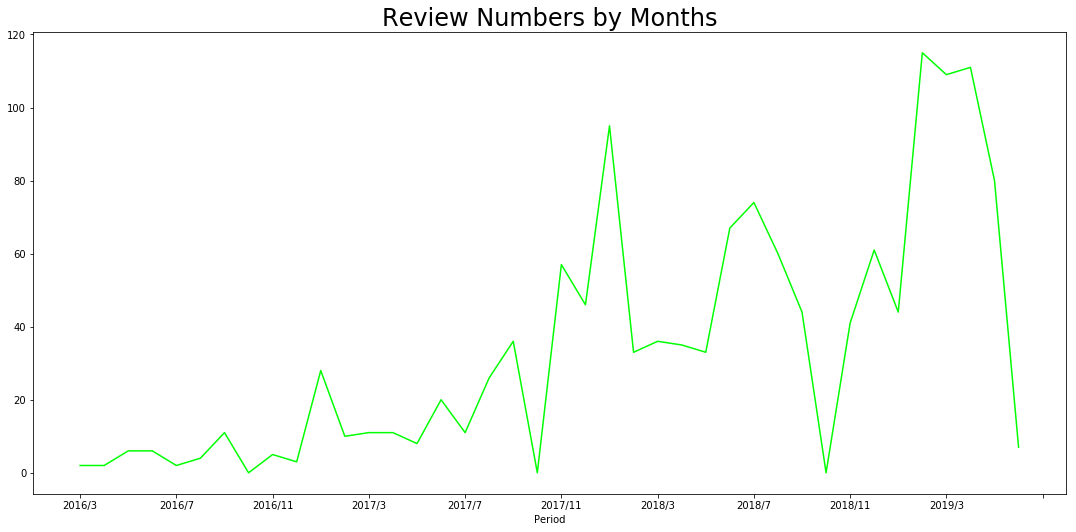

In [43]:
period = []
y = 2016
m = 3
for i in range(40):
    period.append(str(y) + '/' + str(m)) # + ' (' + str(ratingCountOfMonth[i]) + ' reviews)')
    m += 1
    if m > 12:
        m = 1
        y += 1
        
tick_spacing = 4
fig, ax = plt.subplots(1,1)
ax.plot(period, ratingCountOfMonth, color = 'lime')
ax.set_title("Review Numbers by Months", fontsize = 24)
ax.set_xlabel("Period")
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.savefig('/Users/lin/Documents/honestbee_review numbers.png')

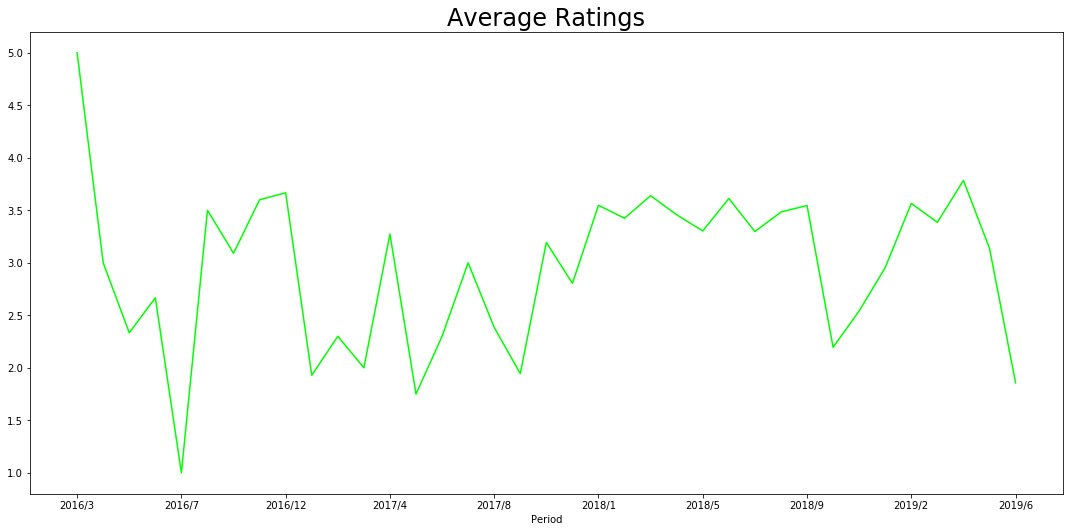

In [44]:
for i in range(40):
    if averageRatingOfMonth[i] == 0:
        averageRatingOfMonth.pop(i)
        weightedRatingOfMonth.pop(i)
        period.pop(i)
        
    if i == len(averageRatingOfMonth) - 1:
        break
        
tick_spacing = 4
fig, ax = plt.subplots(1,1)
ax.plot(period, averageRatingOfMonth, color = 'lime')
ax.set_title("Average Ratings", fontsize = 24)
ax.set_xlabel("Period")
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.savefig('/Users/lin/Documents/honestbee_average ratings.png')
plt.show()

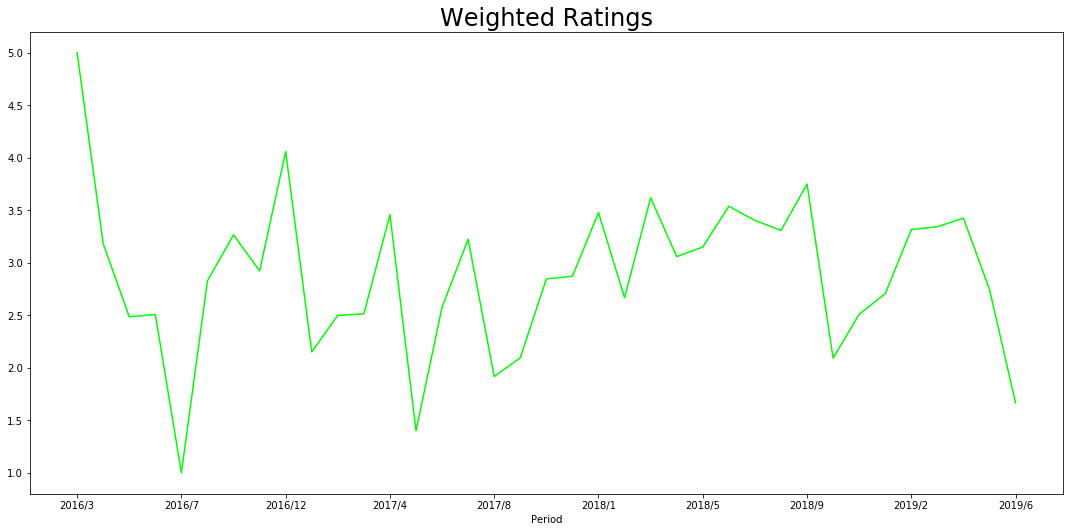

In [45]:
tick_spacing = 4
fig, ax = plt.subplots(1,1)
ax.plot(period, weightedRatingOfMonth, color = 'lime')
ax.set_title("Weighted Ratings", fontsize = 24)
ax.set_xlabel("Period")
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.savefig('/Users/lin/Documents/honestbee_weighted ratings.png')
plt.show()

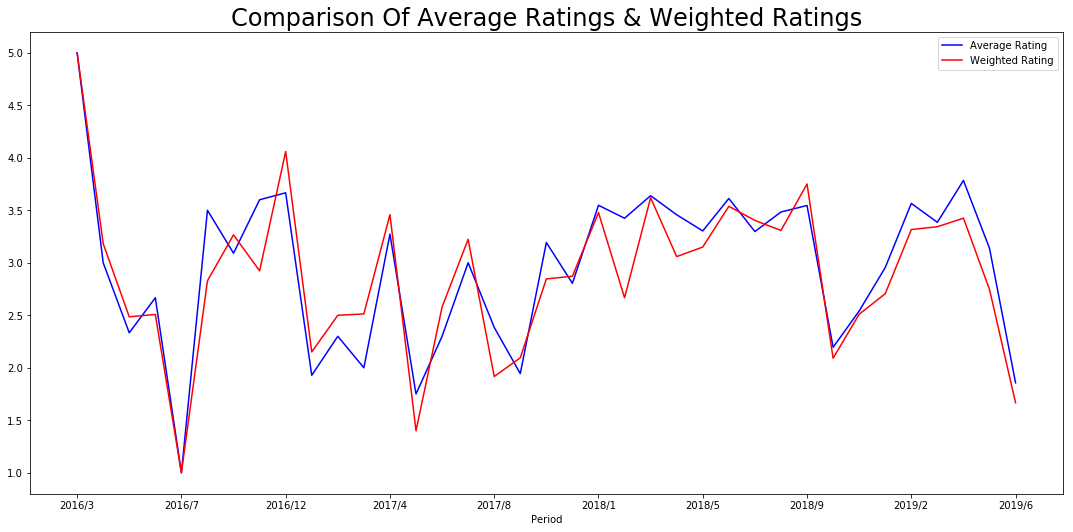

In [46]:
tick_spacing = 4
fig, ax = plt.subplots(1,1)
ax.plot(period, averageRatingOfMonth, color = 'blue', label = 'Average Rating')
ax.plot(period, weightedRatingOfMonth, color = 'red', label = 'Weighted Rating')
ax.set_title("Comparison Of Average Ratings & Weighted Ratings", fontsize = 24)
ax.set_xlabel("Period")
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.savefig('/Users/lin/Documents/honestbee_comparison.png')
plt.legend()
plt.show()

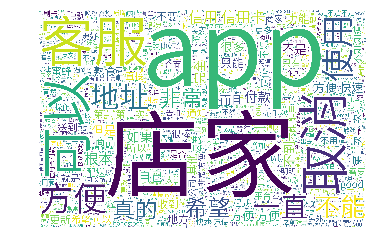

<Figure size 1000x600 with 0 Axes>

In [6]:
from wordcloud import WordCloud
from PIL import Image
import jieba

text_from_file_with_apath = open('honestbee_txt.txt').read()
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)
stopwords = {}.fromkeys([""])
wc = WordCloud(font_path="/Users/lin/Downloads/NotoSansCJKtc-hinted/NotoSansCJKtc-DemiLight.otf",
               background_color="white",
               max_words = 2000,
               stopwords=stopwords,
               width=3600, height=2400
              )

wc.generate(wl_space_split)

plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

wc.to_file("/Users/lin/Documents/honestbee_wordcloud.jpg")

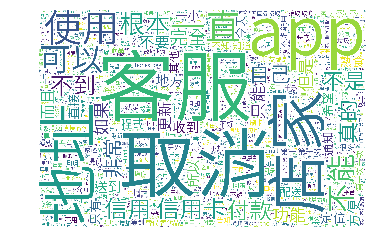

<Figure size 1000x600 with 0 Axes>

In [33]:
text_from_file_with_apath = open('honestbee_txt_1-3.txt').read()
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)
stopwords = {}.fromkeys([""])
wc = WordCloud(font_path="/Users/lin/Downloads/NotoSansCJKtc-hinted/NotoSansCJKtc-DemiLight.otf",
               background_color="white",
               max_words = 2000,
               stopwords=stopwords,
               width=3600, height=2400
              )

wc.generate(wl_space_split)

plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

wc.to_file("/Users/lin/Documents/honestbee_wordcloud_1-3.jpg")

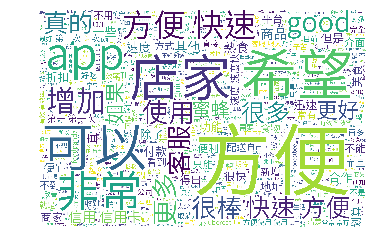

<Figure size 1000x600 with 0 Axes>

In [35]:
text_from_file_with_apath = open('honestbee_txt_4-5.txt').read()
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)
stopwords = {}.fromkeys([""])
wc = WordCloud(font_path="/Users/lin/Downloads/NotoSansCJKtc-hinted/NotoSansCJKtc-DemiLight.otf",
               background_color="white",
               max_words = 2000,
               stopwords=stopwords,
               width=3600, height=2400
              )

wc.generate(wl_space_split)

plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

wc.to_file("/Users/lin/Documents/honestbee_wordcloud_4-5.jpg")